<a href="https://colab.research.google.com/github/AyaAhmed01/Machine-Learning-Projects/blob/main/A5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_3 SVM

Aya Emad Fouad Ahmed

sec 1, BN: 18

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 2: SVM

### Use the following function to plot the classification regions

In [ ]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma='auto', kernel= 'linear')
clf.fit(X_train, y_train)

In [ ]:
plot_class_regions_for_classifier(clf, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

In [ ]:
clf1 = svm.SVC(gamma='auto', kernel= 'linear', C=0.00001)   # C controls overfitting, Smaller C bigger regularization smaller overfitting. Must be strictly positive. The penalty is a squared l2 penalty
clf1.fit(X_train, y_train)

clf2 = svm.SVC(gamma='auto', kernel= 'linear', C=100)
clf2.fit(X_train, y_train)

plot_class_regions_for_classifier(clf1, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)
plot_class_regions_for_classifier(clf2, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

The first classifier used small C, making big regularization effect and oversimplifying the model resulting in large bias error.
The second one uses bigger C, with less regularization and better model

### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
from google.colab import files
upload = files.upload()

Saving fruitsData.txt to fruitsData.txt


In [ ]:
df = pd.read_table('fruitsData.txt')
features= ['height', 'width', 'mass', 'color_score']
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [ ]:
X_fruits= df[features]    # X of all listed features
y_fruits = df.fruit_label

X_fruits_small = X_fruits[['height', 'width']]
X_fruits_train, X_fruits_test, y_fruits_train, y_fruits_test = train_test_split(X_fruits_small, y_fruits, random_state=0, test_size=0.25)

lin_clf = svm.SVC(gamma='auto', kernel= 'linear', C=100)
lin_clf.fit(X_fruits_train, y_fruits_train)

y_fruits.max()

4

#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

SVC implements “one-vs-one” multi-class strategy, thus training 4 classes, it trains 6 models

In [ ]:
coefs = lin_clf.coef_
intercepts = lin_clf.intercept_

print(coefs, intercepts)

[[ 0.74999906  0.24999969]
 [-3.44664808  2.41192235]
 [-1.62117748  2.70195545]
 [-0.73131977 -0.31796512]
 [-0.71065935  0.05076138]
 [-2.59252235  6.66616284]] [ -6.07499311   8.51891739  -5.53906645   6.40858653   4.02537775
 -25.14518157]
<class 'pandas.core.frame.DataFrame'>


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


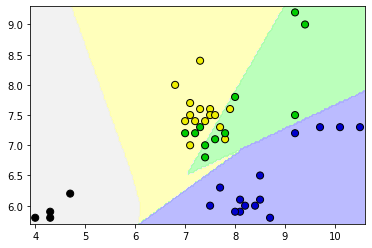

In [ ]:
X_fruits_train = X_fruits_train.to_numpy()  # convert panda.series to numpy array
plot_class_regions_for_classifier(lin_clf, X_fruits_train, y_fruits_train)

from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

X_cancer = df[df.columns[:-1]]
y_cancer = df.target

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, random_state=0, test_size=0.25)

param_grid = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}

clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_cancer_train, y_cancer_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'kernel': ('poly', 'rbf')},
             return_train_score=True)

In [ ]:
print(grid_search.best_params_)

{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
clf = svm.SVC(gamma='auto', kernel= 'rbf', C=10)
clf.fit(X_cancer_train, y_cancer_train)

SVC(C=10, gamma='auto')

In [ ]:
print("training score: ", clf.score(X_cancer_train, y_cancer_train))   # gives 1, overfitting
print("Testing score: ", clf.score(X_cancer_test, y_cancer_test))    # very high bias error

training score:  1.0
Testing score:  0.6293706293706294


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

selector = SelectKBest(f_classif, k=20)
selector.fit_transform(X_cancer_train, y_cancer_train)     # choose only the best 20 features (with highest score)

# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
new_X_train = X_cancer_train.iloc[:, cols_idxs]
new_X_test = X_cancer_test.iloc[:, cols_idxs]

# normalize the features using MinMaxScalar
X_normalized = MinMaxScaler().fit_transform(new_X_train)
X_normalized = pd.DataFrame(X_normalized)

clf.fit(X_normalized, y_cancer_train)
print("training score: ", clf.score(X_normalized, y_cancer_train))
print("Testing score: ", clf.score(new_X_test, y_cancer_test))

training score:  0.9835680751173709
Testing score:  0.6293706293706294


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
